In [1]:
1+1

2

In [16]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END # framework that helps you design and manage the flow
# of tasks in your application using a graph

In [17]:
# We now create an AgentState - shared data structure that keeps track of information as
# your application runs.abs

class AgentState(TypedDict):
        message : str

def greeting_node(state: AgentState) -> str:
        """Simple node that adds a greeting message to the state"""

        # state['message'] = "Hey "+state["message"]+",how is your day going?"
        state['message'] = state["message"]+", you're doing an amazing job learning LangGraph!"

        return state


graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

graph.add_edge(START, "greeter")
graph.add_edge("greeter", END)

app = graph.compile()

# from IPython.display import Image, display
# display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({"message":"Bob"})

In [19]:
result["message"]

"Bob, you're doing an amazing job learning LangGraph!"

### Graph II

In [20]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [21]:
class AgentState2(TypedDict):
        values: List[int]
        name: str
        result: str

In [25]:
def process_values(state: AgentState2) -> AgentState2:
        """This function handles multiple different inputs"""

        state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"
        return state


graph = StateGraph(AgentState2)

graph.add_node("process", process_values)

graph.set_entry_point("process")
graph.set_finish_point("process")

app = graph.compile()

# from IPython.display import display, Image
# display(Image(app.get_graph().draw_mermaid_png()))

answers = app.invoke({"values": [1, 2, 3, 4], "name":"Steve"})
print(answers["result"])

Hi there Steve! Your sum = 10


## Graph III
## Sequential Graph

In [26]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [27]:
class AgentState(TypedDict):
        name:str
        age: str
        final: str

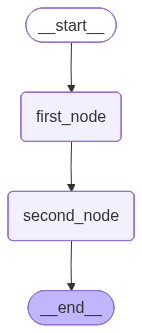

In [38]:
def first_node(state:AgentState) -> AgentState:
        """This is the first node of our sequence"""

        state["final"] = f"Hi {state["name"]}"
        return state

def second_node(state:AgentState) -> AgentState:
        """This is the second node of our sequence"""

        state["final"] = state["final"] + f" You are {state["age"]} years old!"
        # state["final"] = f"You are {state["age"]} years old!"

        return state


graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", END)
# graph.set_finish_point("second_node") 

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))




In [40]:
result = app.invoke({"name":"Cherli", "age":26})
print(result["final"])


Hi Cherli You are 26 years old!


### Excersise III

In [42]:
class AgentState(TypedDict):
        name:str
        age:str
        skills:List[str]
        result:str

In [54]:
def first_node(state:AgentState) -> AgentState:
        """This is the first node to do greet"""

        state["result"] = f"{state["name"]}, welcome to the system!"
        return state

def second_node(state:AgentState) -> AgentState:
        """This is second node to define age"""

        state["result"] = state["result"] + f" You are {state["age"]} years old!"
        return state

def third_node(state:AgentState) -> AgentState:
        """This is third node to define skills"""

        state["result"] = state["result"] + f" You have skills in: {state["skills"]}"
        return state


graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
# graph.add_edge("third_node", END)


app = graph.compile()

# from IPython.display import Image, display
# display(Image(app.get_graph().draw_mermaid_png()))

response = app.invoke({"name":"Linda", "age":27, "skills":["Python", "Machine Learning", "LangGraph"]})

print(response["result"])

Linda, welcome to the system! You are 27 years old! You have skills in: ['Python', 'Machine Learning', 'LangGraph']


### Graph IV conditional graph

In [55]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [90]:
class AgentState(TypedDict):
        number1: int
        number2: int
        finalNumber1: int
        finalNumber2: int
        operation: str
        operation2: str
        number3: int
        number4: int


In [95]:
def adder(state: AgentState) -> AgentState:
        """This node adds the 2 numbers"""

        state["finalNumber1"] = state["number1"] + state["number2"]
        return state
def adder2(state: AgentState) -> AgentState:
        """This node adds the 2 numbers"""

        state["finalNumber1"] = state["number3"] + state["number4"]
        return state

def sumbstracter(state: AgentState) -> AgentState:
        """This node substracts the 2 numbers"""

        state["finalNumber2"] = state["number1"] - state["number2"]
        return state
        
def sumbstracter2(state: AgentState) -> AgentState:
        """This node substracts the 2 numbers"""

        state["finalNumber2"] = state["number3"] - state["number4"]
        return state

def decide_next_node(state:AgentState) -> AgentState:
        """This node will select the next node of the graph"""

        if state["operation"] == "+":
                return "addition_operation"
        elif state["operation"] == "-":
                return "subtraction_operation"
def decide_next_node2(state:AgentState) -> AgentState:
        """This node will select the next node of the graph"""

        if state["operation2"] == "+":
                return "addition_operation"
        elif state["operation2"] == "-":
                return "subtraction_operation"
        

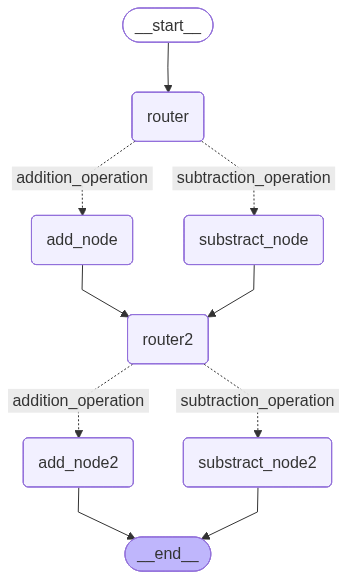

In [96]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("add_node2", adder2)
graph.add_node("substract_node", sumbstracter)
graph.add_node("substract_node2", sumbstracter2)
graph.add_node("router", lambda state:state) # passthrough function
graph.add_node("router2", lambda state:state) # passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
        "router",
        decide_next_node,
        {
                "addition_operation": "add_node",
                "subtraction_operation": "substract_node"
        }
)
graph.add_edge("add_node", "router2")
graph.add_edge("substract_node", "router2")
graph.add_conditional_edges(
        "router2",
        decide_next_node2,
        {
                "addition_operation": "add_node2",
                "subtraction_operation": "substract_node2"
        }
)
graph.add_edge("add_node2", END)
graph.add_edge("substract_node2", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [97]:
print(app.invoke({"number1":10,"operation":"-","number2":5, "number3":7, "number4":2, "operation2":"+"}))

{'number1': 10, 'number2': 5, 'finalNumber1': 9, 'finalNumber2': 5, 'operation': '-', 'operation2': '+', 'number3': 7, 'number4': 2}


## Excersise IV is above one👆

### Graph V Looping Graph

In [57]:
from langgraph.graph import StateGraph, START, END
import random
from typing import Dict, List, TypedDict

In [62]:
class AgentState(TypedDict):
        name: str
        number: List[int]
        counter: int
        result:str

In [69]:
def greeting_node(state: AgentState) -> AgentState:
        """Greeting Node which says hi to the person"""
        state["name"] = f"Hi there, {state["name"]}"
        # state["result"] = f"Hi there, {state["name"]}"
        state["counter"] = 0
        return state

def random_node(state: AgentState) -> AgentState:
        """Generates a random number from 0 to 10"""
        state["number"].append(random.randint(0, 10))
        state["counter"] += 1
        return state

def should_continue(state: AgentState) -> AgentState:
        """Function to decide what to do next"""
        if state["counter"] < 5:
                # state["result"] = f"{state["result"]} You'r countable number is {state["number"]}"
                print("ENTERING LOOP", state["counter"])
                return "loop"
        else:
                return "exit"

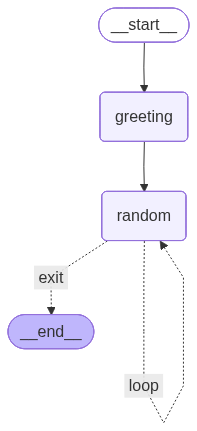

In [70]:
graph = StateGraph(AgentState)

graph.add_node("greeting",greeting_node)
graph.add_node("random",random_node)

graph.add_edge(START, "greeting")
graph.add_edge("greeting", "random")
graph.add_conditional_edges(
        "random",   # Source node
        should_continue, # Action
        {
                "loop":"random", # Self-loop back to same node
                "exit":END    # End the Graph
        }
)

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [71]:
print(app.invoke({"name":"Vaibhav", "number":[], "counter":-1}))

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4
{'name': 'Hi there, Vaibhav', 'number': [3, 1, 9, 9, 3], 'counter': 5}
